# Regresión lineal: predecir el margen de los proyectos


## Descarga e instalación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', context='notebook')

## Descargando los datos
Descarguemos los datos y veamos cómo se ven.

In [2]:
df = pd.read_csv('/home/ccortes/Documents/python/PythonScikitLearnRegLin/data/raw_data.csv')
print(df.shape)
df.head(20)



(459, 18)


,Project Number,Project Name,Customer,Country,PM,PA,Order Value (kUSD),Booked Margin (%),Initial Completion Date (mm/dd/yyy),Current Backlog (kUSD),FX,Actual Margin (%),QGR,QMS Comments,Projected Margin (%),EAC (- or +),Margin Risk Cost (kUSD),Margin Opportunity Cost (kUSD)
0,P3MXO00530,PEMEX ABK A DIS SUM INST PRUEBAS SM,PEMEX EXPLORACION Y PRODUCCION,MX,DOMINGO PEREZ,IRIS DE JESUS MORALES,"$11,296.68",34.50%,9/20/2020,$1.64,0.05,28.86%,100%,Closed,0%,-34%,$ -,$ -
1,P7MXP00096,"PEP-Migraci��n SDMC planta 5E, 5T",PEMEX EXPLORACION Y PRODUCCION,MX,FANUEL PEREZ,YADELIZ ALEJANDRO,"$10,650.66",32.01%,9/30/2024,$516.05,0.05,28.87%,80%,On time,28.87%,-3%,$320.00,$ -
2,P3BRO00366,SUEZ BRAZIL,Suez Brazil,BR,Adilson Engelmann,Giovanna Bianchicastro,$587.64,30.36%,3/21/2021,$ -,0.19,11.16%,100%,Closed,11%,-19%,$ -,$ -
3,P7MXP00055,Pemex-Integracion de SGYF Enlace Li,PEMEX EXPLORACION Y PRODUCCION,MX,JUAN MANUEL RAMOS,SAIRA AIDE VENTURA,"$5,841.62",37.70%,3/31/2025,$ -,0.05,36.40%,0%,Solucion no esta QGR,39%,1%,$ -,$ -
4,P3BRO00483,SULZER - P78,SULZER BRASIL SA,BR,Adilson Engelmann,Giovanna Bianchicastro,$325.89,20.12%,9/24/2021,$ -,0.19,30.89%,0%,Solucion,32%,12%,$ -,$0.89
5,P7MXP00045,Pemex - Sistema Paro por Emergencia,PEMEX EXPLORACION Y PRODUCCION,MX,GABRIEL MORALES,IRIS DE JESUS MORALES,"$5,590.80",37.26%,6/30/2024,$166.43,0.05,37.26%,100%,Closed,37.11%,0%,$ -,$ -
6,P3MXO00710,PEP / Rehabilitacion Quemador CB-8,PEMEX EXPLORACION Y PRODUCCION,MX,JUAN MANUEL RAMOS,IRIS DE JESUS MORALES,"$5,040.46",37.00%,6/30/2025,$ -,0.05,23.59%,0%,Services,47.46%,10%,$ -,$ -
7,P7MXM00025,Pemex_Patines Medicion en CCC Palom,PEMEX EXPLORACION Y PRODUCCION,MX,MARCO ROJAS MARTINEZ,SAIRA AIDE VENTURA,"$4,939.93",25.03%,12/29/2023,$533.14,0.05,20.49%,0%,Service - Closed,20.49%,-5%,$ -,NaN
8,P7MXP00095,PTI -PETROQ COSOLEACAQUE 2DA FASE-M,Pemex Transformacion Industrial,MX,GABRIEL MORALES,IRIS DE JESUS MORALES,"$4,823.64",31.91%,4/7/2024,$540.19,0.05,31.91%,33%,Proximo a vencer,37.97%,6%,$ -,$ -
9,P7MXP00137,PEP-SG&F MARCA TRIPLEX INCLUYE OBRA,PEMEX EXPLORACION Y PRODUCCION,MX,GABRIEL MORALES,IRIS DE JESUS MORALES,"$4,616.99",32.28%,11/27/2023,$ -,0.05,37.44%,63%,On time,38.82%,7%,$ -,$ -


In [3]:
#Escribe el codigo para visualizar los tipos de datos de cada columna
df.dtypes

Project Number                          object
Project Name                            object
Customer                                object
Country                                 object
PM                                      object
PA                                      object
Order Value (kUSD)                      object
Booked Margin (%)                       object
Initial Completion Date (mm/dd/yyy)     object
Current Backlog (kUSD)                  object
FX                                     float64
Actual Margin (%)                       object
QGR                                     object
QMS Comments                            object
Projected Margin (%)                    object
EAC (- or +)                            object
Margin Risk Cost (kUSD)                 object
Margin Opportunity Cost (kUSD)          object
dtype: object

In [ ]:

# --- 1. Definir las columnas a limpiar ---
columnas_a_limpiar = [
    'Order Value (kUSD)',
    'Booked Margin (%)',
    'Current Backlog (kUSD)',
    'Actual Margin (%)',
    'QGR',
    'Projected Margin (%)',
    'EAC (- or +)',
    'Margin Risk Cost (kUSD)',
    'Margin Opportunity Cost (kUSD)'
]

# --- 2. Limpiar las columnas numéricas ---
for col in columnas_a_limpiar:
    # Asegurarse de que la columna sea de tipo texto para poder usar .str
    df[col] = df[col].astype(str)

    # Reemplazar casos especiales como '$ -' o '-' por '0'
    df[col] = df[col].str.replace('$ -', '0', regex=False).str.replace(' -', '0', regex=False)

    # Eliminar el resto de caracteres no numéricos ($, ,, %)
    df[col] = df[col].str.replace('$', '', regex=False) \
                     .str.replace(',', '', regex=False) \
                     .str.replace('%', '', regex=False) \
                     .str.strip()

    # Convertir la columna limpia a tipo numérico, los errores se volverán NaN (Nulos)
    df[col] = pd.to_numeric(df[col], errors='coerce')


# --- 3. Convertir la columna de fecha a tipo datetime ---
df['Initial Completion Date (mm/dd/yyy)'] = pd.to_datetime(df['Initial Completion Date (mm/dd/yyy)'], errors='coerce')


df.head(20)



,Project Number,Project Name,Customer,Country,PM,PA,Order Value (kUSD),Booked Margin (%),Initial Completion Date (mm/dd/yyy),Current Backlog (kUSD),FX,Actual Margin (%),QGR,QMS Comments,Projected Margin (%),EAC (- or +),Margin Risk Cost (kUSD),Margin Opportunity Cost (kUSD)
0,P3MXO00530,PEMEX ABK A DIS SUM INST PRUEBAS SM,PEMEX EXPLORACION Y PRODUCCION,MX,DOMINGO PEREZ,IRIS DE JESUS MORALES,11296.68,34.50,2020-09-20,1.64,0.05,28.86,100.0,Closed,0.00,-34.0,0.0,0.00
1,P7MXP00096,"PEP-Migraci��n SDMC planta 5E, 5T",PEMEX EXPLORACION Y PRODUCCION,MX,FANUEL PEREZ,YADELIZ ALEJANDRO,10650.66,32.01,2024-09-30,516.05,0.05,28.87,80.0,On time,28.87,-3.0,320.0,0.00
2,P3BRO00366,SUEZ BRAZIL,Suez Brazil,BR,Adilson Engelmann,Giovanna Bianchicastro,587.64,30.36,2021-03-21,0.00,0.19,11.16,100.0,Closed,11.00,-19.0,0.0,0.00
3,P7MXP00055,Pemex-Integracion de SGYF Enlace Li,PEMEX EXPLORACION Y PRODUCCION,MX,JUAN MANUEL RAMOS,SAIRA AIDE VENTURA,5841.62,37.70,2025-03-31,0.00,0.05,36.40,0.0,Solucion no esta QGR,39.00,1.0,0.0,0.00
4,P3BRO00483,SULZER - P78,SULZER BRASIL SA,BR,Adilson Engelmann,Giovanna Bianchicastro,325.89,20.12,2021-09-24,0.00,0.19,30.89,0.0,Solucion,32.00,12.0,0.0,0.89
5,P7MXP00045,Pemex - Sistema Paro por Emergencia,PEMEX EXPLORACION Y PRODUCCION,MX,GABRIEL MORALES,IRIS DE JESUS MORALES,5590.80,37.26,2024-06-30,166.43,0.05,37.26,100.0,Closed,37.11,0.0,0.0,0.00
6,P3MXO00710,PEP / Rehabilitacion Quemador CB-8,PEMEX EXPLORACION Y PRODUCCION,MX,JUAN MANUEL RAMOS,IRIS DE JESUS MORALES,5040.46,37.00,2025-06-30,0.00,0.05,23.59,0.0,Services,47.46,10.0,0.0,0.00
7,P7MXM00025,Pemex_Patines Medicion en CCC Palom,PEMEX EXPLORACION Y PRODUCCION,MX,MARCO ROJAS MARTINEZ,SAIRA AIDE VENTURA,4939.93,25.03,2023-12-29,533.14,0.05,20.49,0.0,Service - Closed,20.49,-5.0,0.0,NaN
8,P7MXP00095,PTI -PETROQ COSOLEACAQUE 2DA FASE-M,Pemex Transformacion Industrial,MX,GABRIEL MORALES,IRIS DE JESUS MORALES,4823.64,31.91,2024-04-07,540.19,0.05,31.91,33.0,Proximo a vencer,37.97,6.0,0.0,0.00
9,P7MXP00137,PEP-SG&F MARCA TRIPLEX INCLUYE OBRA,PEMEX EXPLORACION Y PRODUCCION,MX,GABRIEL MORALES,IRIS DE JESUS MORALES,4616.99,32.28,2023-11-27,0.00,0.05,37.44,63.0,On time,38.82,7.0,0.0,0.00


In [5]:
df.dtypes

Project Number                                 object
Project Name                                   object
Customer                                       object
Country                                        object
PM                                             object
PA                                             object
Order Value (kUSD)                            float64
Booked Margin (%)                             float64
Initial Completion Date (mm/dd/yyy)    datetime64[ns]
Current Backlog (kUSD)                        float64
FX                                            float64
Actual Margin (%)                             float64
QGR                                           float64
QMS Comments                                   object
Projected Margin (%)                          float64
EAC (- or +)                                  float64
Margin Risk Cost (kUSD)                       float64
Margin Opportunity Cost (kUSD)                float64
dtype: object

## Analizando los datos
Se observará cómo se distribuyen los datos de la variable a predecir.

(459, 18)


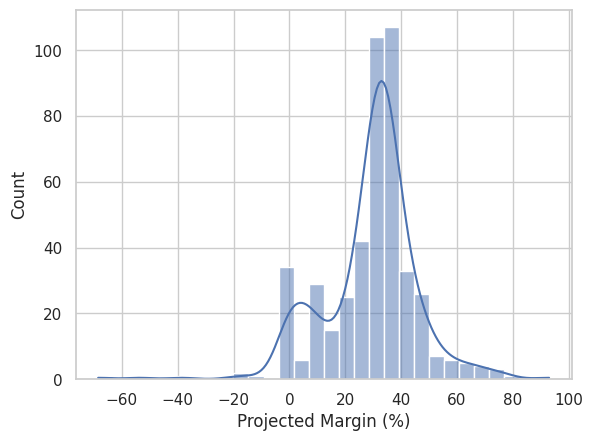

In [11]:
print(df.shape)
sns.histplot(data=df, x=df['Projected Margin (%)'],kde=True, bins=30)
plt.show()


Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

En este caso, al ser pocos datos (6 de 1338), eliminaremos estos datos atípicos. A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio. 

Sin embargo es importante aclarar que **NO SE DEBEN ELIMINAR** datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos.

## Viendo correlaciones
Ahora entendamos nuestros datos, viendo cómo se distribuyen y correlacionan. 

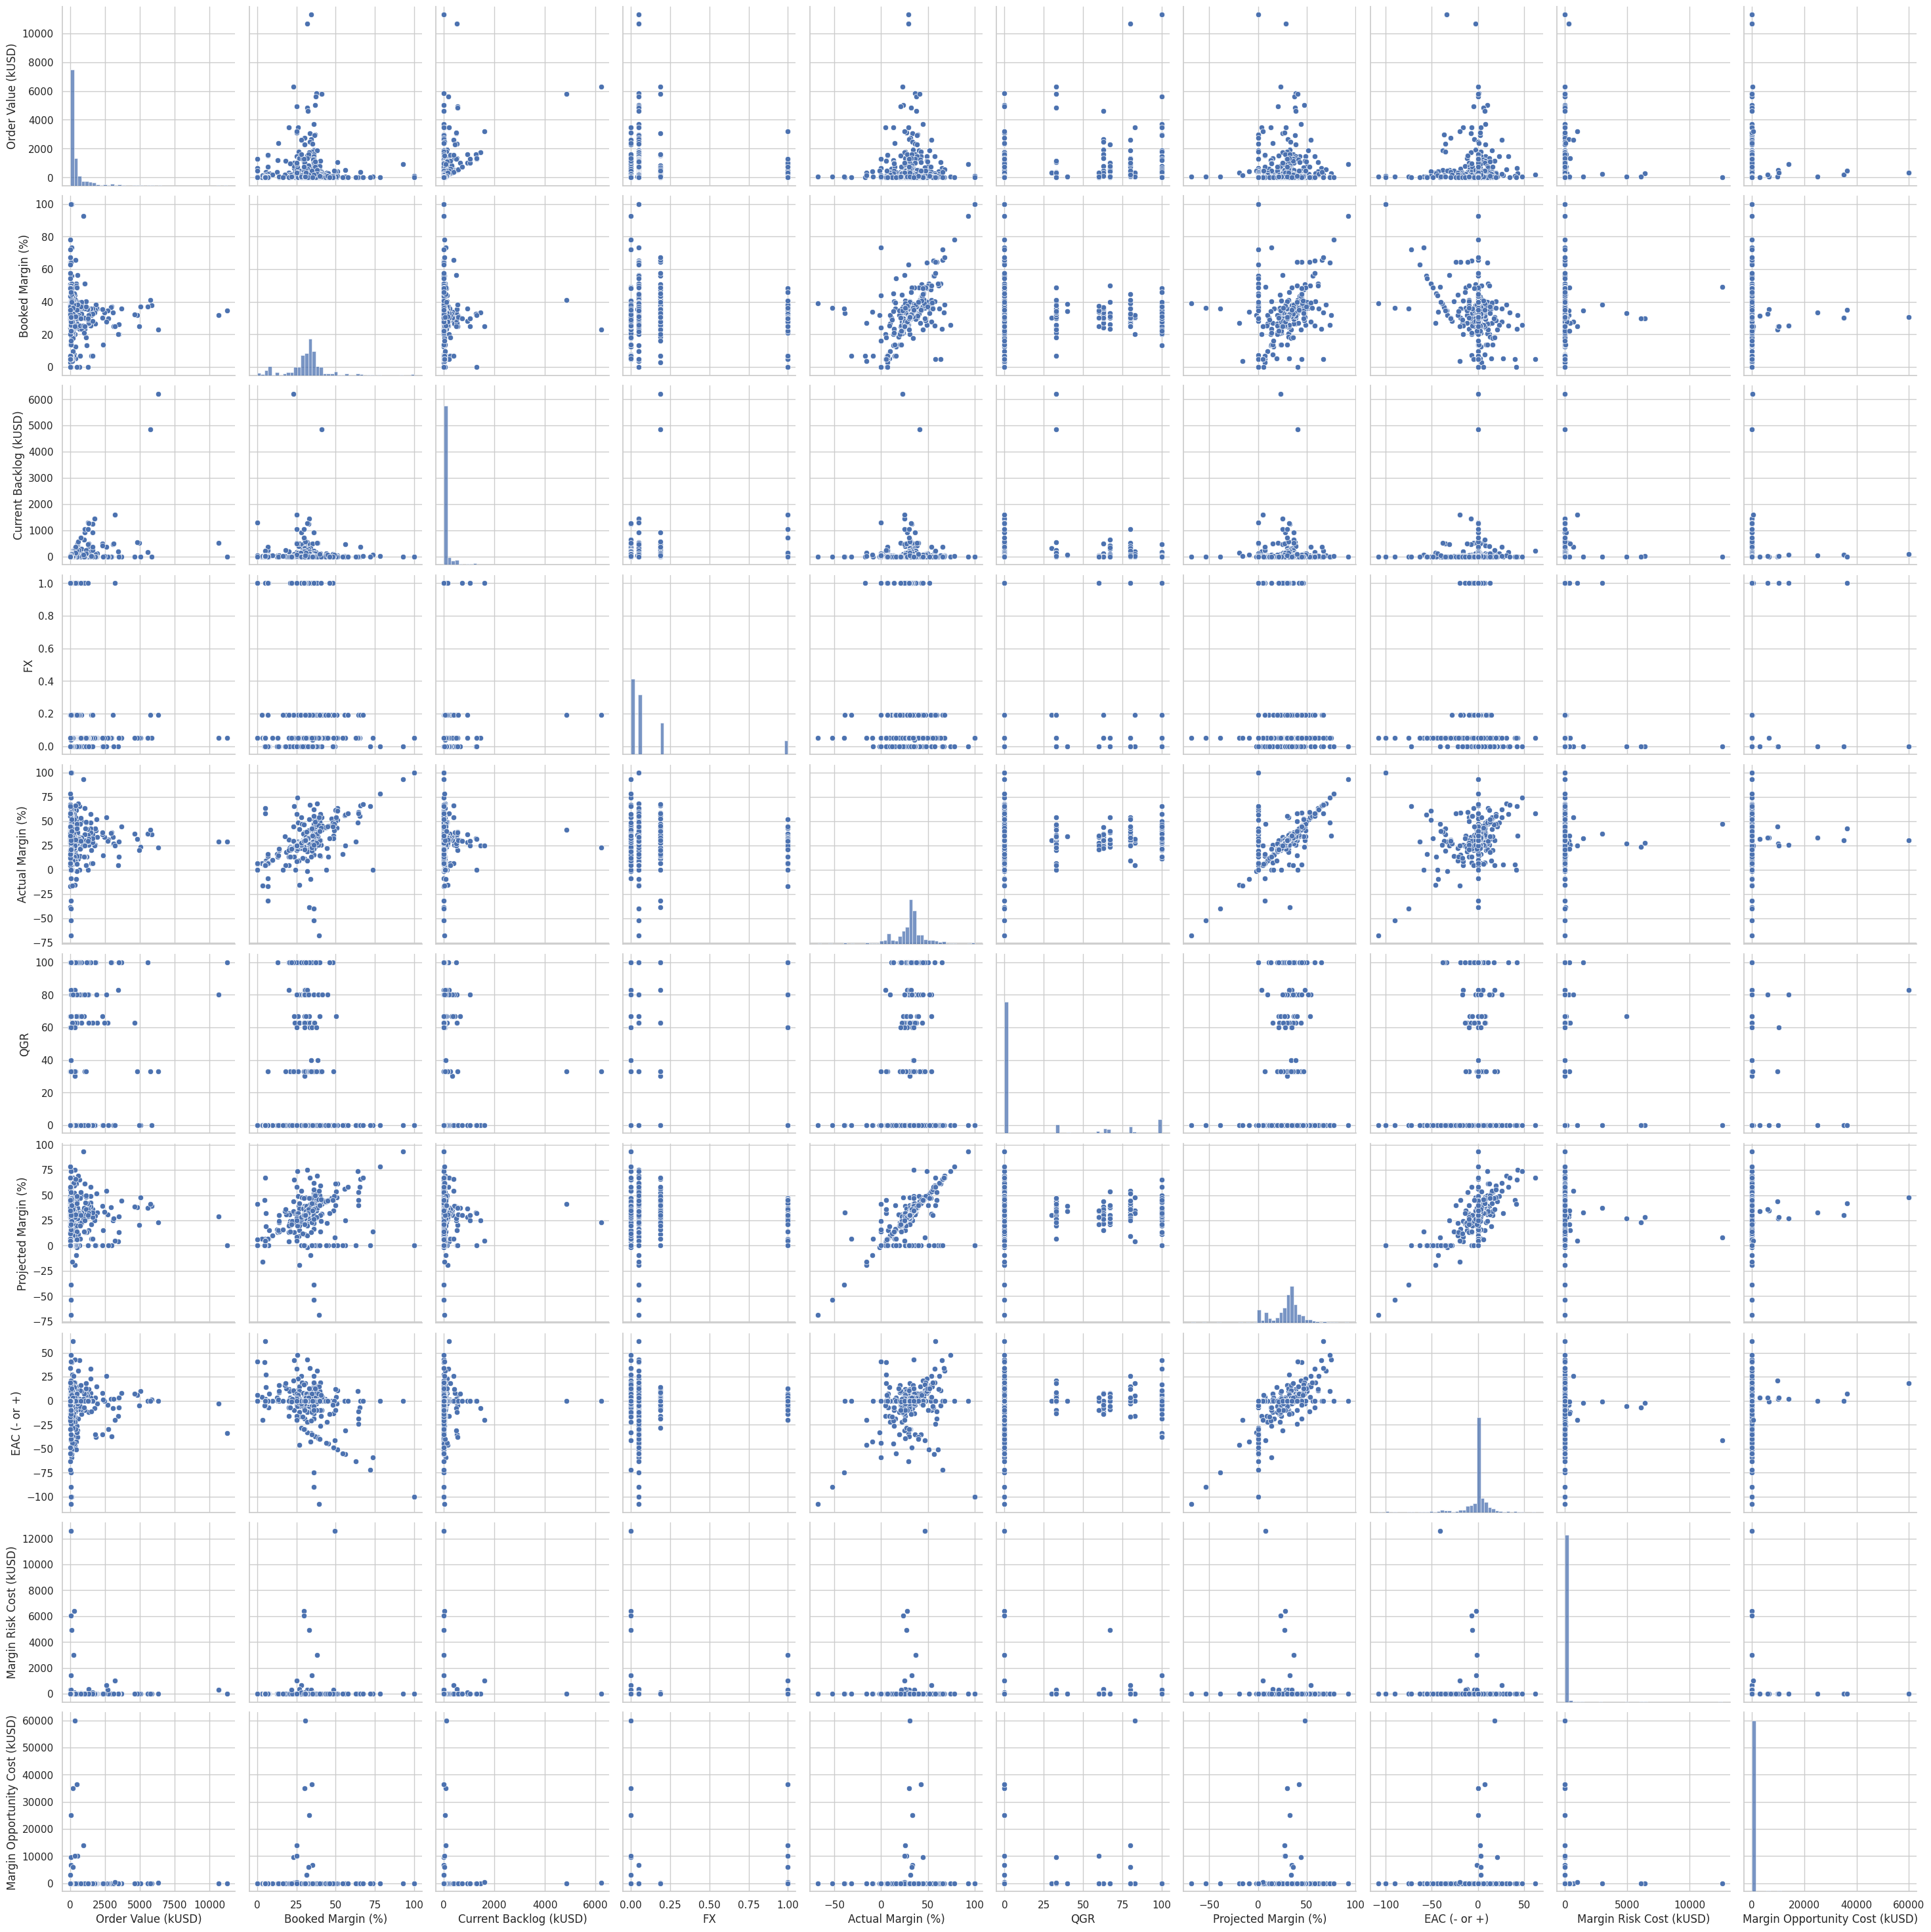

In [9]:
sns.pairplot(df, height=3)
plt.show()

Puntos interesantes a ver:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

✅ Heatmap de correlación generado correctamente.

--- Matriz de Correlación Calculada ---
                                Order Value (kUSD)  Booked Margin (%)  \
Order Value (kUSD)                        1.000000          -0.027512   
Booked Margin (%)                        -0.027512           1.000000   
Current Backlog (kUSD)                    0.426973          -0.033782   
Actual Margin (%)                         0.010250           0.652107   
QGR                                       0.297004          -0.018252   
Projected Margin (%)                     -0.035819           0.327024   
EAC (- or +)                             -0.011396          -0.437668   
Margin Risk Cost (kUSD)                  -0.014267           0.045084   
Margin Opportunity Cost (kUSD)           -0.017461          -0.012058   

                                Current Backlog (kUSD)  Actual Margin (%)  \
Order Value (kUSD)                            0.426973           0.010250   
Booked Margin (%)        

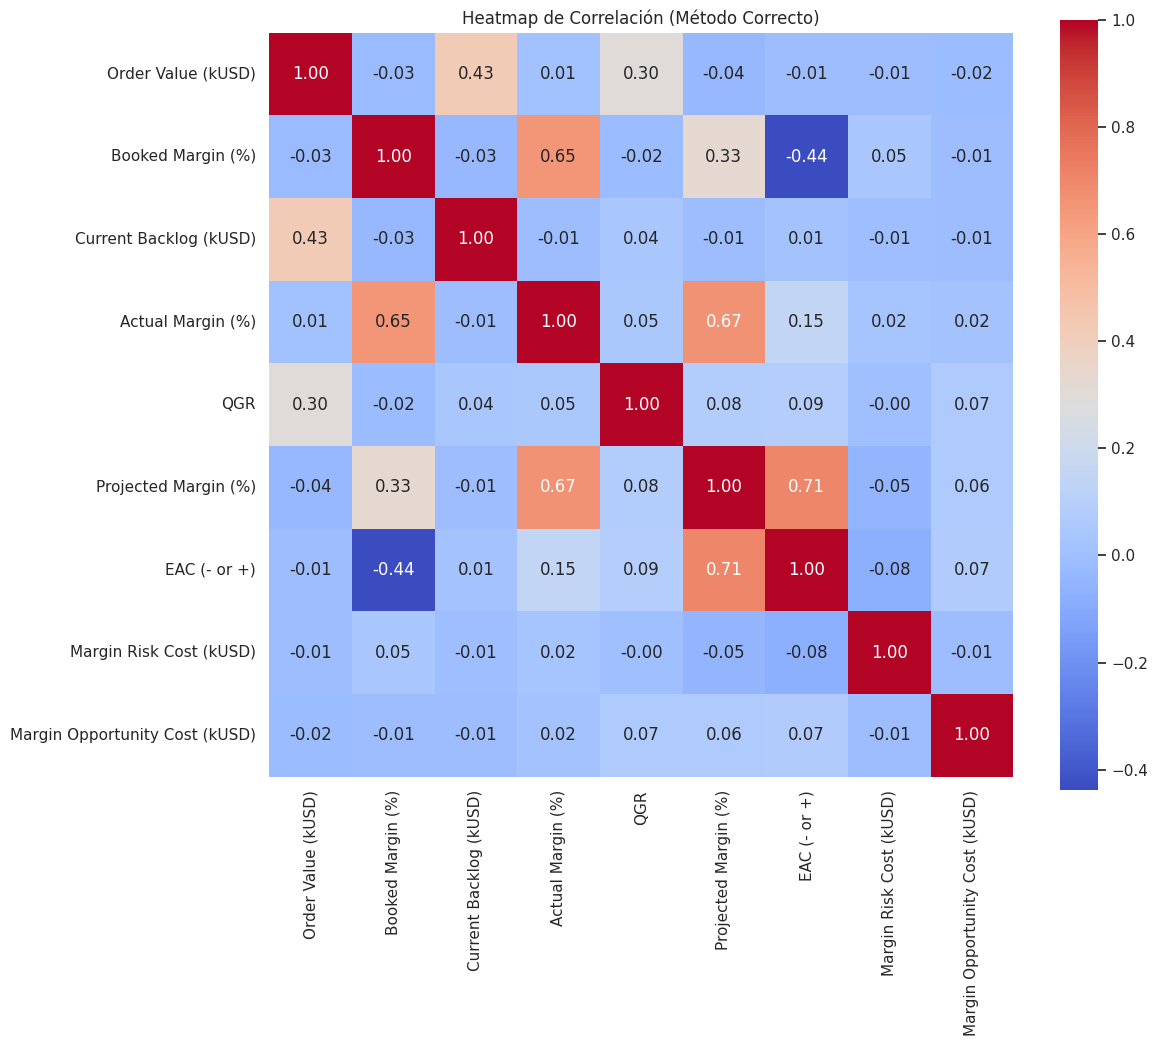

In [15]:
numeric_cols =  ['Order Value (kUSD)',
                 'Booked Margin (%)',
                 'Current Backlog (kUSD)',
                 'Actual Margin (%)',
                 'QGR',
                 'Projected Margin (%)',
                 'EAC (- or +)',
                 'Margin Risk Cost (kUSD)',
                 'Margin Opportunity Cost (kUSD)']

# 1. Calcular la matriz de correlación usando el método de pandas
#    Esta es la línea clave que cambia.
corr_matrix = df[numeric_cols].corr()


# 2. Generar el heatmap
#    El código para graficar es casi idéntico, pero ahora funciona.
plt.figure(figsize=(12, 10))
sns.set_theme(font_scale=1)
sns.heatmap(corr_matrix, cbar=True, annot=True, square=True, fmt='.2f',
            cmap='coolwarm') # Usar un mapa de color bueno para correlaciones

plt.title('Heatmap de Correlación (Método Correcto)')
plt.savefig('heatmap_correlacion_final.png')

print("✅ Heatmap de correlación generado correctamente.")
print("\n--- Matriz de Correlación Calculada ---")
print(corr_matrix)

## Utilizando las demás variables
Las demás variables son variables categoricas, sexo, fumador, región. Para poder utilizarlas utilizaremos la función get_dummies de pandas. 

Ahora la verás en acción

## Creando modelos 
Primero se usará un modelo con todas las variables.

## Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

El siguiente código muestra un resumen general de los resultados.

Finalmente tenemos la función que calcula los residuales. Es importante notar que es una simple resta entre los valores reales y los predichos.

## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

Analizando el segundo modelo